## Imports

In [2]:
# import necessary packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt

from sklearn.metrics import silhouette_score, silhouette_samples

%matplotlib inline


## Setup

In [3]:
# read in data and convert into a DF
myDF = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KrispyKreme.csv")
myDF.head()


,Restaurant_Item_Name,restaurant,Restaurant_ID,Item_Name,Item_Description,Food_Category,Serving_Size,Serving_Size_text,Serving_Size_Unit,Serving_Size_household,...,Total_Fat_100g,Saturated_Fat_100g,Trans_Fat_100g,Cholesterol_100g,Sodium_100g,Potassium_100g,Carbohydrates_100g,Protein_100g,Sugar_100g,Dietary_Fiber_100g
0,Krispy Kreme Apple Fritter,Krispy Kreme,49,Apple Fritter,"Apple Fritter, Doughnuts",Baked Goods,100,NaN,g,NaN,...,19,9,0,0,110,45.0,42,4,26,1.0
1,Krispy Kreme Chocolate Iced Cake Doughnut,Krispy Kreme,49,Chocolate Iced Cake Doughnut,"Chocolate Iced Cake Doughnut, Doughnuts",Baked Goods,71,NaN,g,NaN,...,18,7,0,35,437,49.0,52,4,27,NaN
2,Krispy Kreme Chocolate Iced Custard Filled Dou...,Krispy Kreme,49,Chocolate Iced Custard Filled Doughnut,"Chocolate Iced Custard Filled Doughnut, Doughnuts",Baked Goods,85,NaN,g,NaN,...,18,8,0,0,165,59.0,44,5,20,1.0
3,Krispy Kreme Chocolate Iced Glazed Doughnut,Krispy Kreme,49,Chocolate Iced Glazed Doughnut,"Chocolate Iced Glazed Doughnut, Doughnuts",Baked Goods,63,NaN,g,NaN,...,17,8,0,0,143,56.0,52,5,32,NaN
4,Krispy Kreme Chocolate Iced Glazed Cruller Dou...,Krispy Kreme,49,Chocolate Iced Glazed Cruller Doughnut,"Chocolate Iced Glazed Cruller Doughnut, Doughnuts",Baked Goods,70,NaN,g,NaN,...,14,6,0,29,386,29.0,57,4,37,NaN


In [4]:
# 1: Count the missing data per column, and remove rows with missing data (if any) in the specific columns: Sodium_100g, Total_Fat_100g and Sugar_100g
print(myDF.isnull().sum())
myDF = myDF.dropna(subset = ["Sodium_100g", "Sugar_100g", "Total_Fat_100g"])
myDF = myDF.reset_index()
myDF.head()


Restaurant_Item_Name        0
restaurant                  0
Restaurant_ID               0
Item_Name                   0
Item_Description            0
Food_Category               0
Serving_Size                0
Serving_Size_text         205
Serving_Size_Unit           0
Serving_Size_household    198
Calories                    0
Total_Fat                   0
Saturated_Fat               0
Trans_Fat                   0
Cholesterol                 0
Sodium                      0
Potassium                 166
Carbohydrates               0
Protein                     0
Sugar                       0
Dietary_Fiber              31
Calories_100g               0
Total_Fat_100g              0
Saturated_Fat_100g          0
Trans_Fat_100g              0
Cholesterol_100g            0
Sodium_100g                 0
Potassium_100g            166
Carbohydrates_100g          0
Protein_100g                0
Sugar_100g                  0
Dietary_Fiber_100g         31
dtype: int64


,index,Restaurant_Item_Name,restaurant,Restaurant_ID,Item_Name,Item_Description,Food_Category,Serving_Size,Serving_Size_text,Serving_Size_Unit,...,Total_Fat_100g,Saturated_Fat_100g,Trans_Fat_100g,Cholesterol_100g,Sodium_100g,Potassium_100g,Carbohydrates_100g,Protein_100g,Sugar_100g,Dietary_Fiber_100g
0,0,Krispy Kreme Apple Fritter,Krispy Kreme,49,Apple Fritter,"Apple Fritter, Doughnuts",Baked Goods,100,NaN,g,...,19,9,0,0,110,45.0,42,4,26,1.0
1,1,Krispy Kreme Chocolate Iced Cake Doughnut,Krispy Kreme,49,Chocolate Iced Cake Doughnut,"Chocolate Iced Cake Doughnut, Doughnuts",Baked Goods,71,NaN,g,...,18,7,0,35,437,49.0,52,4,27,NaN
2,2,Krispy Kreme Chocolate Iced Custard Filled Dou...,Krispy Kreme,49,Chocolate Iced Custard Filled Doughnut,"Chocolate Iced Custard Filled Doughnut, Doughnuts",Baked Goods,85,NaN,g,...,18,8,0,0,165,59.0,44,5,20,1.0
3,3,Krispy Kreme Chocolate Iced Glazed Doughnut,Krispy Kreme,49,Chocolate Iced Glazed Doughnut,"Chocolate Iced Glazed Doughnut, Doughnuts",Baked Goods,63,NaN,g,...,17,8,0,0,143,56.0,52,5,32,NaN
4,4,Krispy Kreme Chocolate Iced Glazed Cruller Dou...,Krispy Kreme,49,Chocolate Iced Glazed Cruller Doughnut,"Chocolate Iced Glazed Cruller Doughnut, Doughnuts",Baked Goods,70,NaN,g,...,14,6,0,29,386,29.0,57,4,37,NaN


## Introductory Analysis

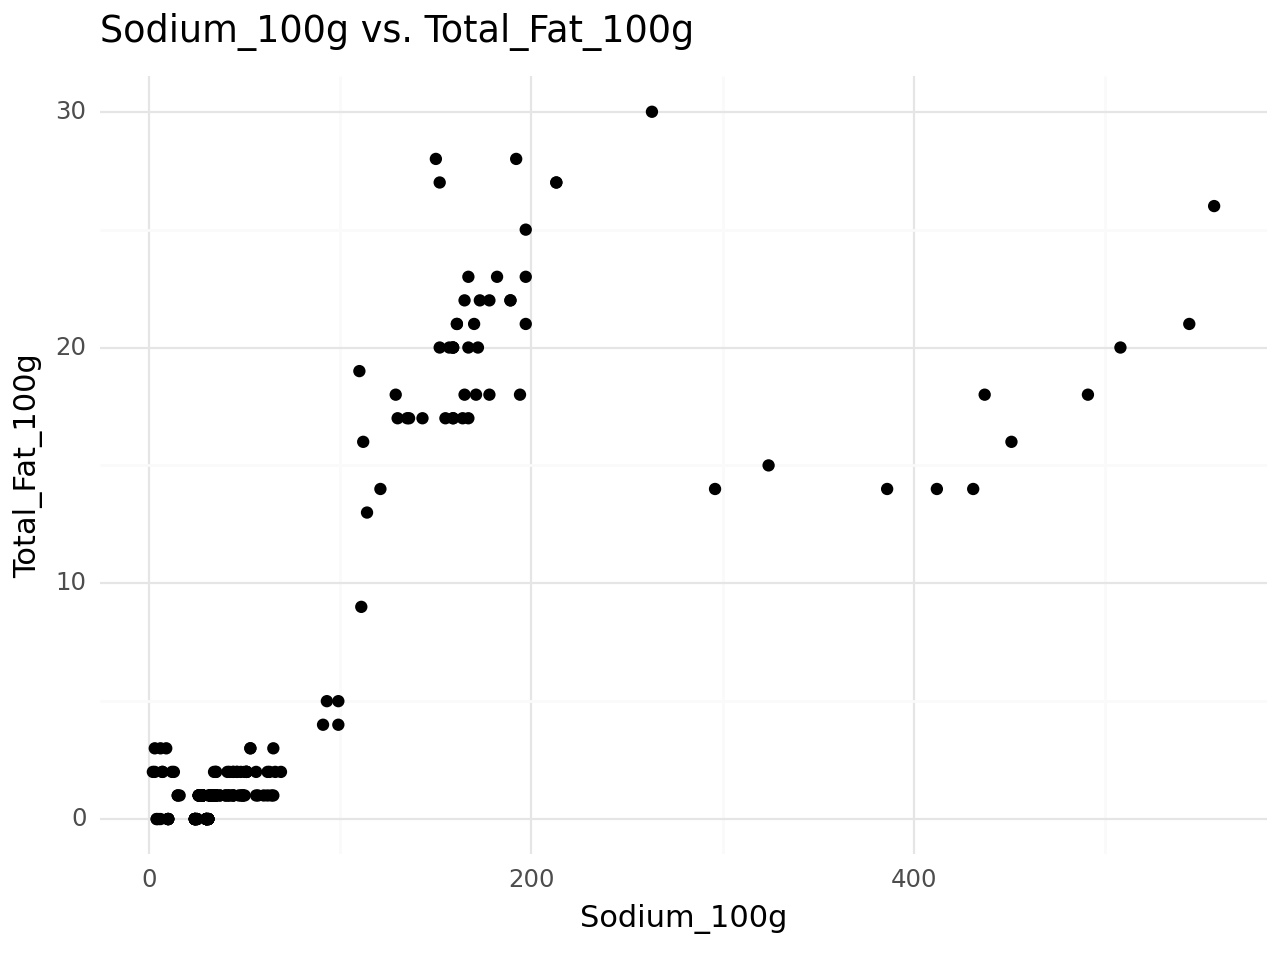

In [5]:
# creating a scatterplot to show relationship between Sodium_100g and Total_Fat_100g
print(ggplot(myDF, aes(x = "Sodium_100g", y = "Total_Fat_100g")) + geom_point() +
        theme_minimal() + labs(title = "Sodium_100g vs. Total_Fat_100g"))

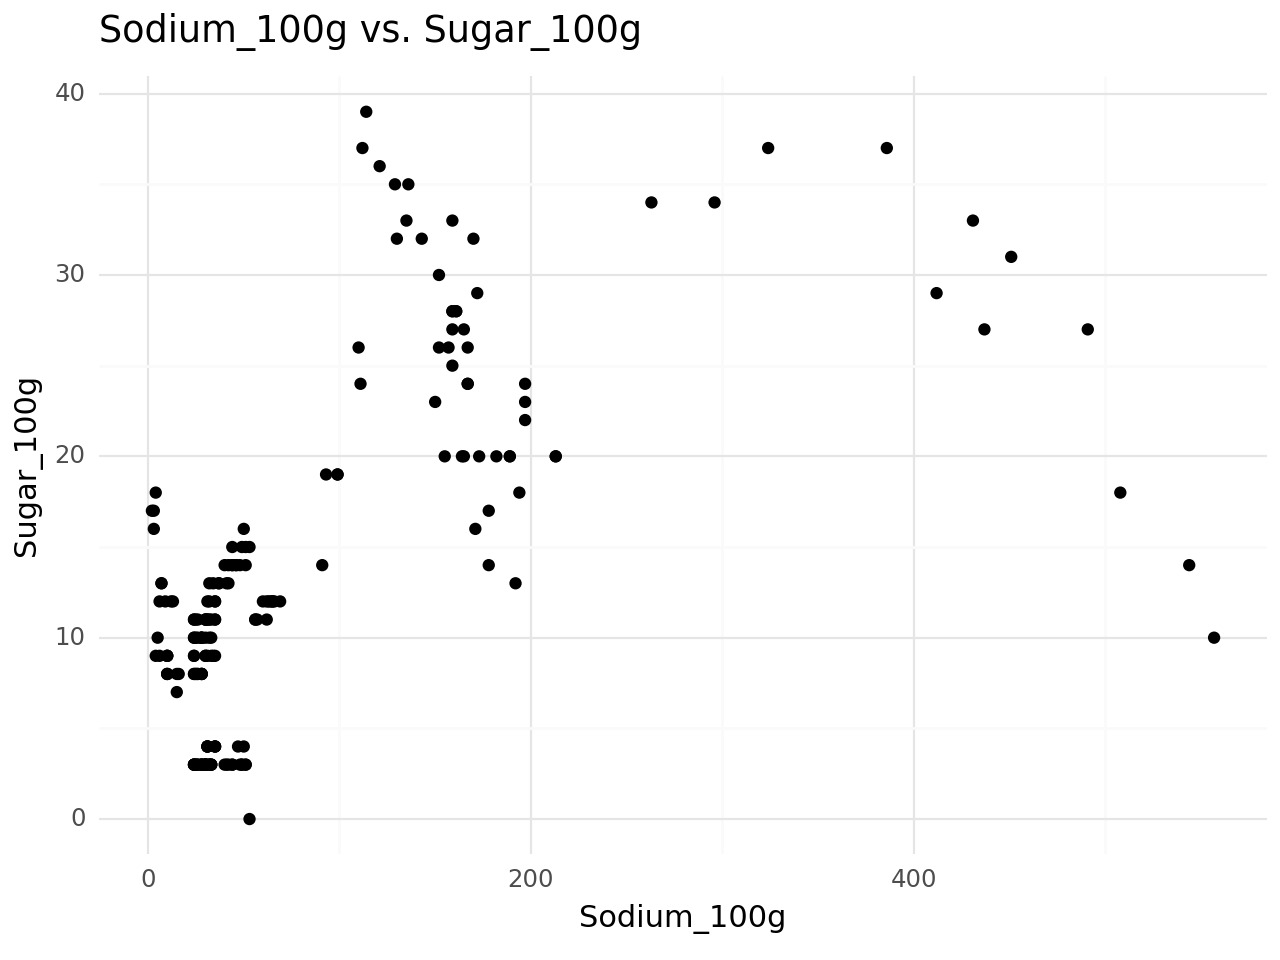

In [6]:
# creating a scatterplot to show relationship between Sodium_100g and Sugar_100g
print(ggplot(myDF, aes(x = "Sodium_100g", y = "Sugar_100g")) + geom_point() +
        theme_minimal() + labs(title = "Sodium_100g vs. Sugar_100g"))

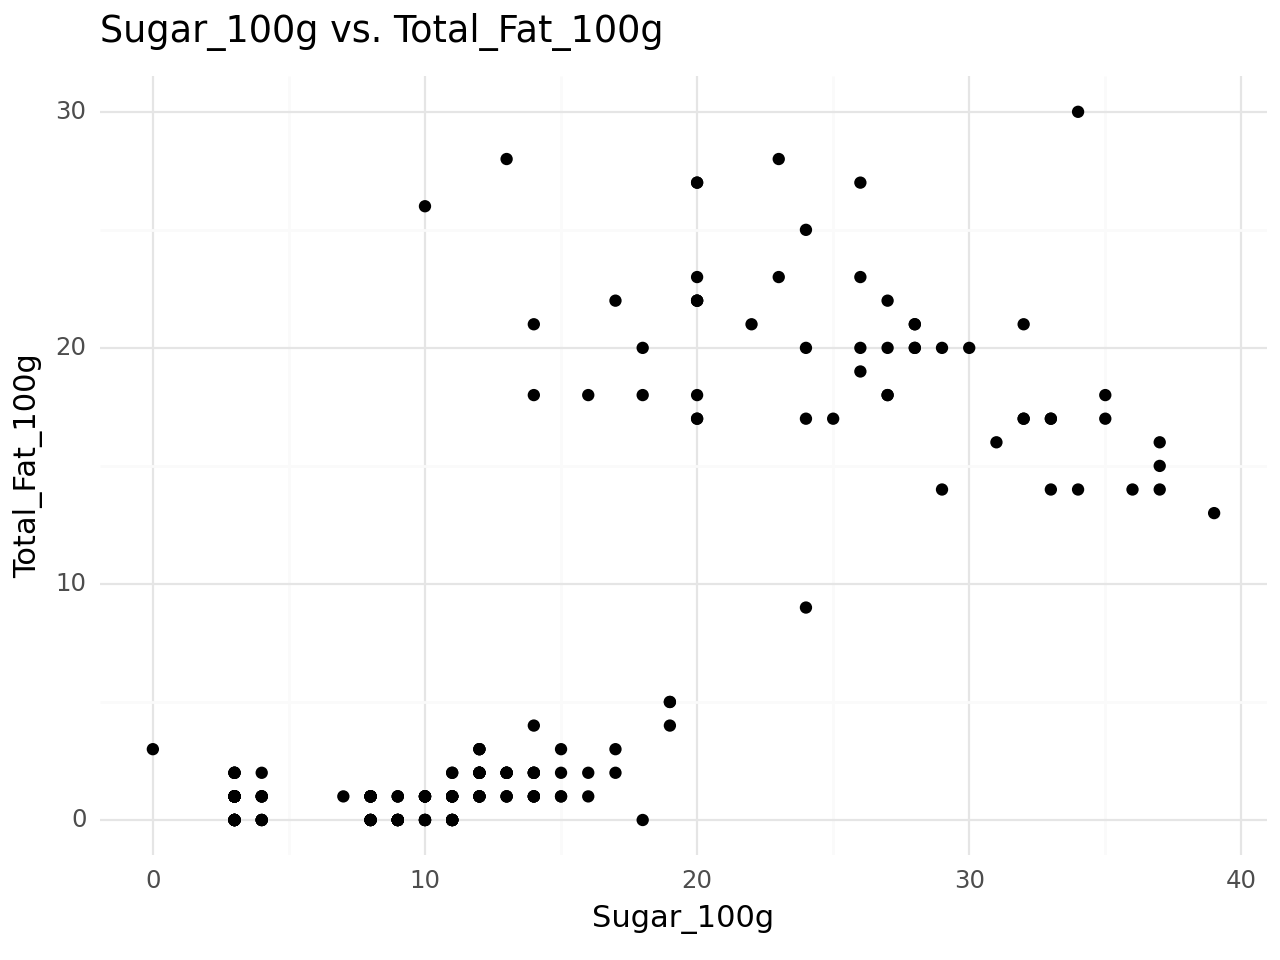

In [7]:
# creating a scatterplot to show relationship between Sugar_100g and Total_Fat_100g
print(ggplot(myDF, aes(x = "Sugar_100g", y = "Total_Fat_100g")) + geom_point() +
        theme_minimal() + labs(title = "Sugar_100g vs. Total_Fat_100g"))

## Determining Clustering Model to Use

When looking at the different scatterplots made, and considering the context of the data. I believe that a **Hierarchical** model would perform the best

KMeans:

To begin with, **KMeans** works under the assumption that the variances are equal, meaning that the clusters will be spherical. Looking at the scatterplots, we can see that the data is made up of elliptical, curved groups, so **KMeans** would not work very well. Furthermore, another assumption with **KMeans** is that there is roughly the same number of datapoints in each cluster, and looking at the scatterplots, this is not always the case. Finally, **KMeans** is extremely sensitive to noise, and since the scatterplots above appear to have a good deal of noise, the centroids of the clusters will likely be far awy from the true center of the cluster. As such, the **KMeans** model will likely be the worst model.

Gaussian Mixtures:

Looking at the flaws of the **KMeans** model, it looks like a **Gaussian** model could work pretty well. Many of the clusters appear to be elliptcal, and since **GMM** allows for different variances, this model could capture the clusters of the data well. The main issue that we can see with **GMM** is that it cannot deal with noise very well. Looking at the different scatterplots, there is a good deal of noise, which cam make it so the clusters are expanded beyond what they truly are.

DBSCAN:

After considering how the main flaw of **GMM** is the noise present in the scatterplots, **DBSCAN** would seem like the ovbious choice. **DBSCAN** can differentiate between noise, border, and core points, making it a strong contender for creating clusters that accurately reflect the relationships between the datapoints. The main downside with **DBSCAN** is that it loses its viability if clusters are very close to eachother, touching, or overlapping. By the nature of **DBSCAN**, the model looks to see the distance between points, and if the distance (epsilon) encompasses values of more than one cluster, it will make the decision that those two seemingly independent clusters are actually a single cluster. Looking at the scatterplots, some of the clusters seem to be very close to eachother, and I have reservations about choosing **DBSCAN** without seeing how the model would attribute points to noise vs a part of a cluster. In addition to this, the densities of the clusters are different, which is also a key part of making **DBSCAN** work. As such I do not think it would be the best model to capture the relationships with the data.

Hierarchical Agglomerative:

Looking at the scatterplots, I believe that a **Hierarchical** model will work best. **Hierarchical** models makes no assumptions about the shape of the cluster, and allows for a flexible number of clusters, making it apply itself to most data well. Considering that our predictors of sugar, sodium, and fat are related in determining the unhealthiness of a donut, which is what our model is trying to determine, points that are closets together will be clustered and then from there we can see which donuts are are most simlar in these variables. From there we can see the overarching clusters of the "labels" of donut categories. While **Hierarchical** models are also sensitive to noise and have the drawback of not being able to ungroup clusters, I believe that its stringth in being able to best see which points are the most similar to others makes it the strongest model for this data.




## Model Creation

In [8]:
# setting up features to build the model
features = ["Sodium_100g", "Sugar_100g", "Total_Fat_100g"]                                     # setting predictors and outcome
X = myDF[features]

z = StandardScaler()                                                                           # zscoring
X[features] = z.fit_transform(X[features])

### KMeans

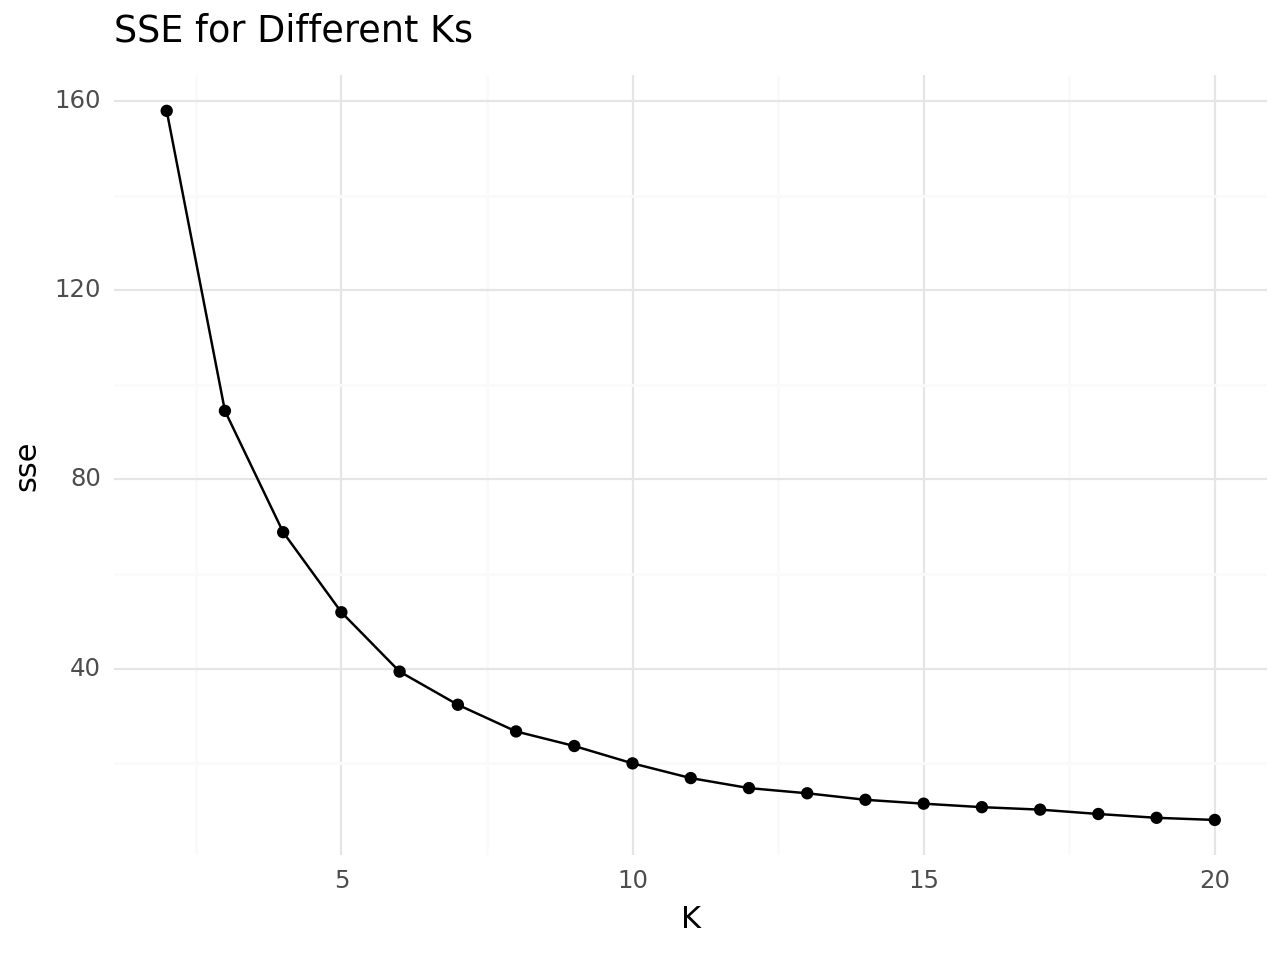

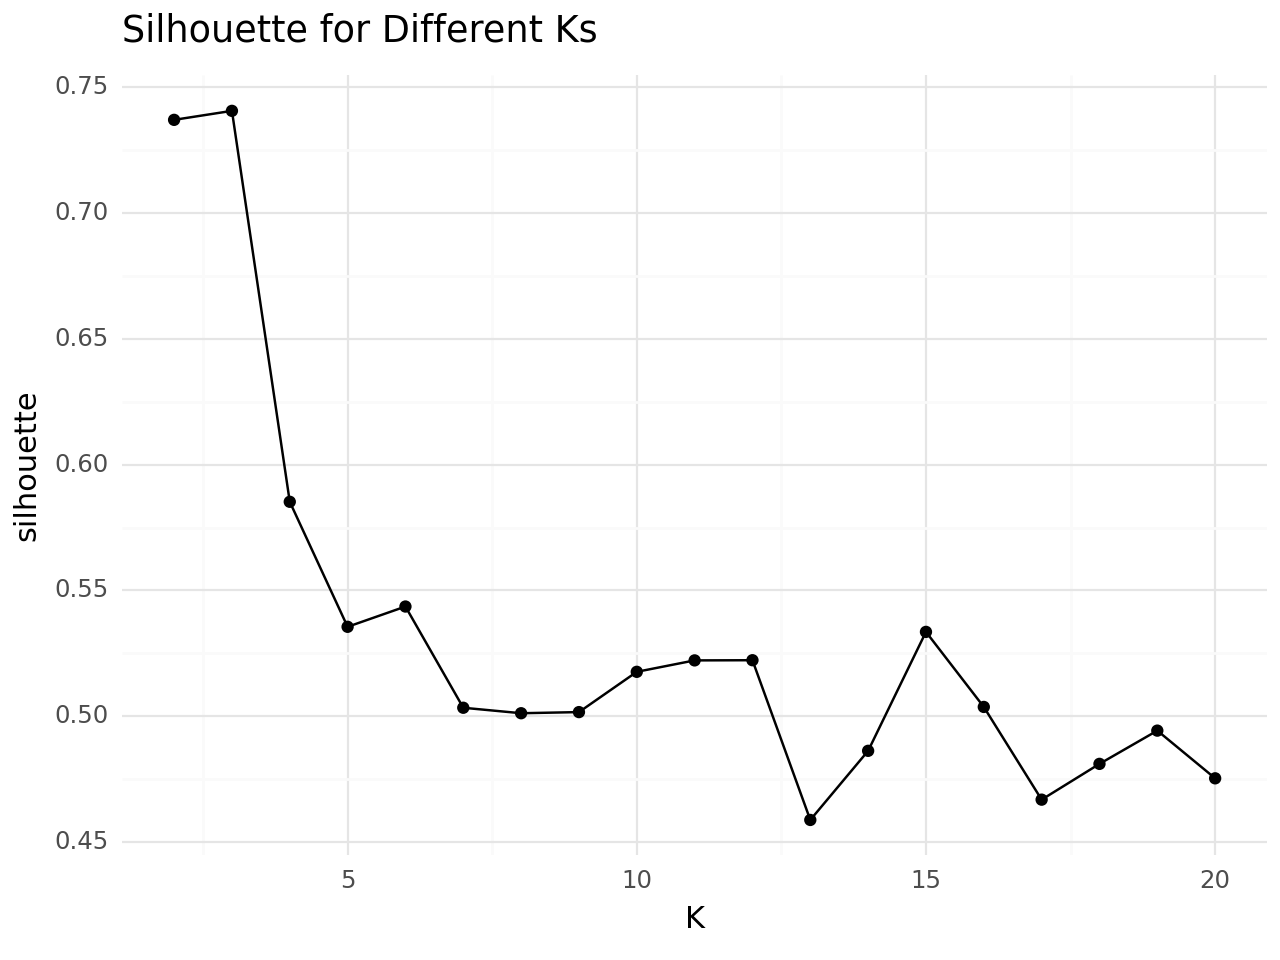

In [9]:
# choosing k
# random values for k
ks = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

# looking and silhouette scores and sum of squared errors to choose the optimal k
sse =  []
sil = []

# for loop to iterate through each possibility of k (from ks), and check the sum of squared errors and silhouete scores
for k in ks:
    km = KMeans(n_clusters = k)
    km.fit(X[features])

    sse.append(km.inertia_)
    sil.append(silhouette_score(X[features], km.predict(X[features])))

# creating a dataframe of the SSE and sil scores
sse_df = pd.DataFrame({"K": ks,
                    "sse": sse,
                    "silhouette": sil})

# creating a scatterplot of the SSE for each value of k
print(ggplot(sse_df, aes(x = "K", y = "sse")) +
    geom_line() + geom_point() +
    theme_minimal() +
    labs(title = "SSE for Different Ks"))

# from here we look for the "elbow", point of diminishing returns

# creating a scatterplot of the sil scored for each value of k
print(ggplot(sse_df, aes(x = "K", y = "silhouette")) +
    geom_line() + geom_point() +
    theme_minimal() +
    labs(title = "Silhouette for Different Ks"))

For the KMeans model we chose the number of clusters, k, by plotting a graph showing the SSE for the different values of K, as well as the silhouette scores for the different values of K

By using the elbow method, we can see that the optimal K would be when the number of clusters is 6.

In [10]:
# fitting our model with k = 6
km2 = KMeans(n_clusters = 6)
km2.fit(X[features])

membership = km2.predict(X[features])

X["cluster"] = membership

print(silhouette_score(X[features], membership))

0.5414269438455804


### Hierarchical Agglomerative Model

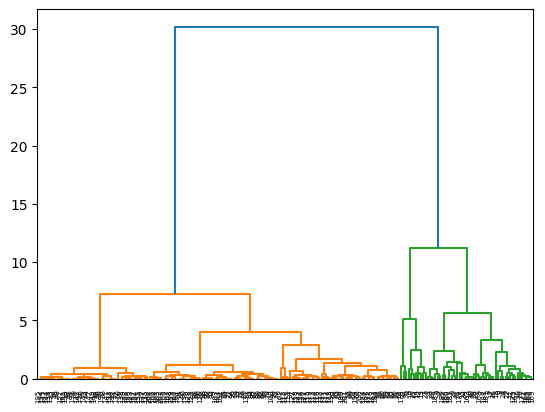

In [ ]:
# create Agglomerative Clustering model
hac = AgglomerativeClustering(n_clusters = 2,
                                affinity = "euclidean",       # choosing the affinity of "euclidean" --> continuous data
                                linkage = "ward")             # choosing the linkage of "ward" --> typically the default

# fitting the model and building a dendrogram
hac.fit(X)
dendro = sch.dendrogram(sch.linkage(X[features], method='ward'))

# grabbing the cluster labers for each point
membership = hac.labels_
X["cluster2"] = membership


In [ ]:
# calculating silhouette score
silhouette_score(X,membership)


0.7366683007935623

For the Hierarchical model we chose the number of clusters, n_clusters, by creating a dendogram to see how many clusters the model would show us.

The dendogram outputs two different clusters indicated by the orange and green clusters. As such, we can set our n_clusters hyperparameter to 2.

I also chose wards linkage as it is most effected by how much the in cluster variance changes as clusters are merged. I also believe that this would be the best fit for the data since we are tying to minimize the distances between clusters to get the most accurate image of how the datapoints are to be clustered, and they dont appear to be consistently spaced.

## Application of Models

### KMeans

The metric that I used to assess the **KMeans** model was the silhouette score. The silhouette score is a measure of both cohesion and separation, where the best possible score is 1, and the worst possible score is -1. I used silhouette score as our metric as it is best way to assess how well clustering algorithms perform, and it can best capture the cohesion and separations of our clusters.

The silhouette score returned from out KMeans model with a hyperparameter of 6 clusters was 0.496025495802345.

Looking at the scatterplots below, it is clear why our silhouette score is not very high. We can see clusters overlapping, and based on the assumption of **KMeans**, the model is not able to accurately capture the relationships between the datapoints and what their clusters appear to be.


### KMeans Scatterplots

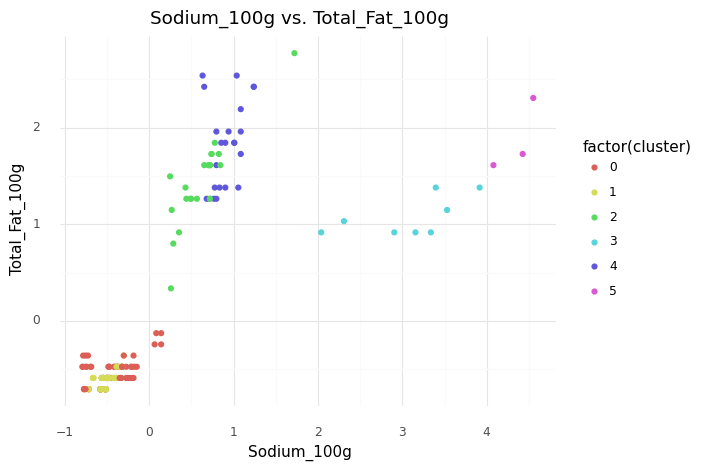

In [ ]:
# creating a scatterplot to show relationship between Sodium_100g and Total_Fat_100g
print(ggplot(X, aes(x = "Sodium_100g", y = "Total_Fat_100g", color = "factor(cluster)")) + geom_point() +
        theme_minimal() + labs(title = "Sodium_100g vs. Total_Fat_100g"))

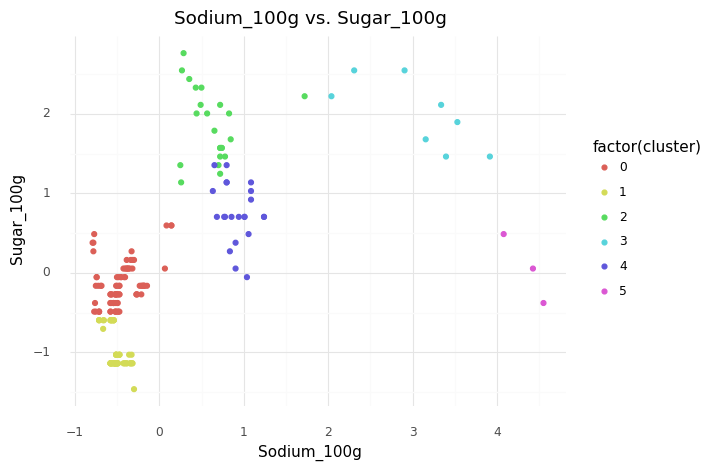

In [ ]:
# creating a scatterplot to show relationship between Sodium_100g and Sugar_100g
print(ggplot(X, aes(x = "Sodium_100g", y = "Sugar_100g", color = "factor(cluster)")) + geom_point() +
        theme_minimal() + labs(title = "Sodium_100g vs. Sugar_100g"))


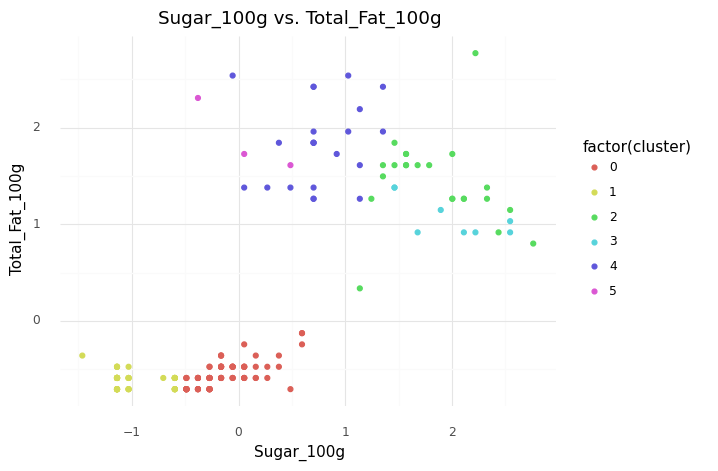

In [ ]:
# creating a scatterplot to show relationship between Sugar_100g and Total_Fat_100g
print(ggplot(X, aes(x = "Sugar_100g", y = "Total_Fat_100g", color = "factor(cluster)")) + geom_point() +
        theme_minimal() + labs(title = "Sugar_100g vs. Total_Fat_100g"))

KMEANS TAKEAWAYS

Within our dataset, the donuts in the yellow cluster are lowest in sodium, total fat, and sugar per 100g of donut, as compared to the donuts in the other clusters. We can label the donuts that belong to the yellow cluster as among the "healthiest donuts" offered.

Within our dataset, the donuts in the red cluster are also lower in sodium, sugar, and total fat per 100g of donut, as compared the donuts in the other clusters, save for the donuts in the light blue cluster. We can label the donuts that belong to the red cluster as among the "healthier donuts" offered.

Within our dataset, the donuts in the green and dark blue clusters are about the same in terms of the amount of sodium and total fat per 100g of donut, however, those in the green group have more sugar than those in dark blue. We can label the donuts in the green and dark blue clusters as among the "middle of the road (in terms of healthiness) donuts" offered, as they are neither considerably unhealthy, nor considerably healtheir in regards to the other donuts in the dataset  

Within our dataset, the donuts in the purple cluster are highest in sodium and total fat per 100g of donut, however they contain less sugar per 100g of donut. We can label the donuts that belong to the purple cluster as among the "unhealthy, but lower sugar content donuts" offered, as they still aren't healthy, but an option for those who need to watch their sugar levels

Within our dataset, the donuts in the light blue cluster contain high amounts of sugar and sodium per 100g of donut, but are around average in terms of total fat per 100g of donut. We can label the donuts that belong to the light blue cluster as among the "most unhealthy donuts" offered.


### Hierarchical

Like I did for **KMeans**, the metric that I used to assess the **Hierarchical** model was the silhouette score.

The silhouette score returned from our **Hierarchical** model with a hyperparameter of 2 clusters was 0.7366683007935623.

From the silhouette scores alone, we can see that compared to our **KMeans** model, the **Hierarchical** model created clusters with overall better separation and cohesion

Looking at the scatterplots below, we can see what decisions the **Hierarchical** model made. While the graphs of sodium vs. total fat and sodium vs. sugar appears to have three clusters, our model made the decision that there are in fact 2 clusters for the data.


### Hierarchical Scatterplots

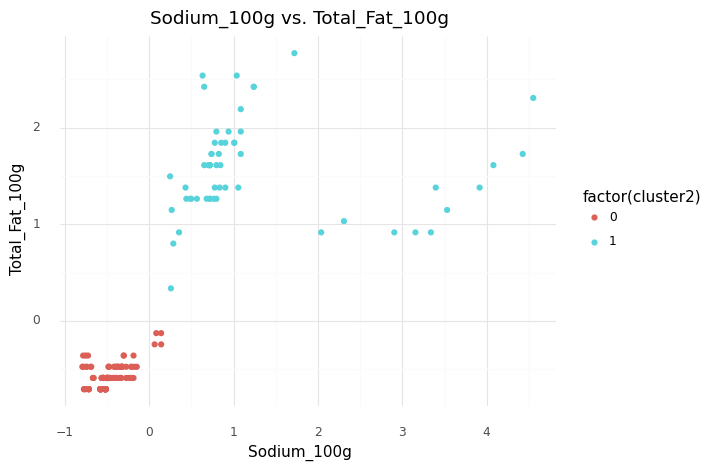

In [ ]:
# creating a scatterplot to show relationship between Sodium_100g and Total_Fat_100g
print(ggplot(X, aes(x = "Sodium_100g", y = "Total_Fat_100g", color = "factor(cluster2)")) + geom_point() +
        theme_minimal() + labs(title = "Sodium_100g vs. Total_Fat_100g"))

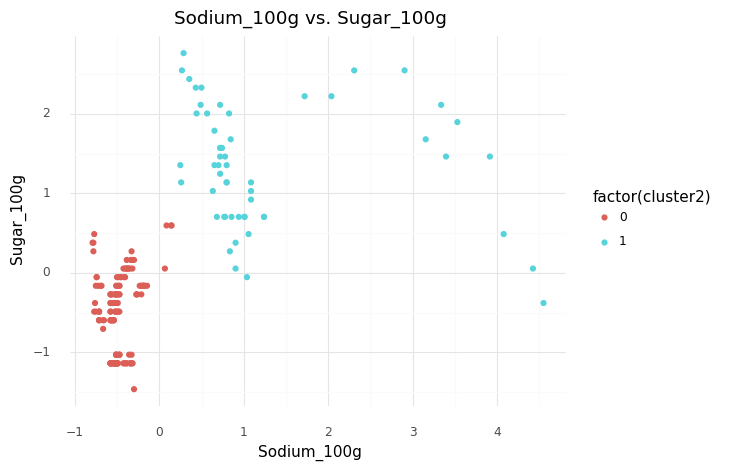

In [ ]:
# creating a scatterplot to show relationship between Sodium_100g and Sugar_100g
print(ggplot(X, aes(x = "Sodium_100g", y = "Sugar_100g", color = "factor(cluster2)")) + geom_point() +
        theme_minimal() + labs(title = "Sodium_100g vs. Sugar_100g"))

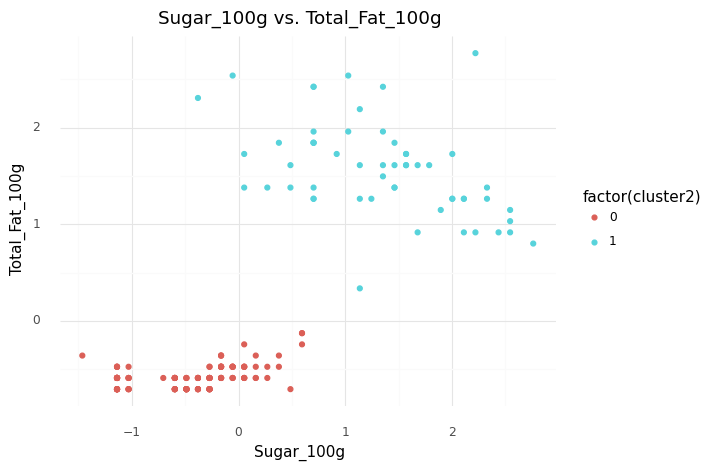

In [ ]:
# creating a scatterplot to show relationship between Sugar_100g and Total_Fat_100g
print(ggplot(X, aes(x = "Sugar_100g", y = "Total_Fat_100g", color = "factor(cluster2)")) + geom_point() +
        theme_minimal() + labs(title = "Sugar_100g vs. Total_Fat_100g"))

HIERARCHICAL TAKEAWAYS

Within our dataset, the donuts in the red cluster are lowest in sodium, total fat, and sugar per 100g of donut, as compared to the donuts in the light blue  cluster. We can label the donuts that belong to the red cluster as among the "healthiest donuts" offered.

Within our dataset, the donuts in the light blue cluster are all over the place. The range of sodium, total fat, and sugar per 100g of donut is comparatively higher than those in the red cluster, but the datapoints are more spread as the cohesion in the cluster is lower. We can label the donuts that belong to the light blue cluster as among the "unhealthier donuts" offered. However this cluster contains a wide spread of the levels of unhealthy donuts, so while there are comparatively unhealthier, there are some donuts that aren't considerably worse.

## Further Understanding


Because we are looking at the factors that dictate whether a donut is "healthy" or not (at least comapratively), I believe another variable that may increase the fit of our model would be the Carbohydrates_100g variable. In the food industry, the Nutrition Facts label puts in bold the factors that are most important to consider: Calories, Total Fat, Cholesterol, Sodium, Total Carbohydrates, and Protein. Because we are looking at data based on donuts, which contain high levels of carbohydrates, I believe that it would help in clustering. It is among the most related with the other predictorss we are using, and paints a better picture about the specific food item and its "healthiness". As such I believe that adding Carbohydrates_100g to our list of predictors will help our **Hierarchical** model most, or at least improve the model. Looking at the output of our model after adding Carbohydrates_100g to our list of predictors, we can see that adding it was the right choice.

In [ ]:
print(myDF.isnull().sum())
myDF = myDF.dropna(subset = ["Sodium_100g", "Sugar_100g", "Total_Fat_100g", "Carbohydrates_100g"])
myDF.head()

level_0                     0
index                       0
Restaurant_Item_Name        0
restaurant                  0
Restaurant_ID               0
Item_Name                   0
Item_Description            0
Food_Category               0
Serving_Size                0
Serving_Size_text         205
Serving_Size_Unit           0
Serving_Size_household    198
Calories                    0
Total_Fat                   0
Saturated_Fat               0
Trans_Fat                   0
Cholesterol                 0
Sodium                      0
Potassium                 166
Carbohydrates               0
Protein                     0
Sugar                       0
Dietary_Fiber              31
Calories_100g               0
Total_Fat_100g              0
Saturated_Fat_100g          0
Trans_Fat_100g              0
Cholesterol_100g            0
Sodium_100g                 0
Potassium_100g            166
Carbohydrates_100g          0
Protein_100g                0
Sugar_100g                  0
Dietary_Fi

,level_0,index,Restaurant_Item_Name,restaurant,Restaurant_ID,Item_Name,Item_Description,Food_Category,Serving_Size,Serving_Size_text,...,Total_Fat_100g,Saturated_Fat_100g,Trans_Fat_100g,Cholesterol_100g,Sodium_100g,Potassium_100g,Carbohydrates_100g,Protein_100g,Sugar_100g,Dietary_Fiber_100g
0,0,0,Krispy Kreme Apple Fritter,Krispy Kreme,49,Apple Fritter,"Apple Fritter, Doughnuts",Baked Goods,100,NaN,...,19,9,0,0,110,45.0,42,4,26,1.0
1,1,1,Krispy Kreme Chocolate Iced Cake Doughnut,Krispy Kreme,49,Chocolate Iced Cake Doughnut,"Chocolate Iced Cake Doughnut, Doughnuts",Baked Goods,71,NaN,...,18,7,0,35,437,49.0,52,4,27,NaN
2,2,2,Krispy Kreme Chocolate Iced Custard Filled Dou...,Krispy Kreme,49,Chocolate Iced Custard Filled Doughnut,"Chocolate Iced Custard Filled Doughnut, Doughnuts",Baked Goods,85,NaN,...,18,8,0,0,165,59.0,44,5,20,1.0
3,3,3,Krispy Kreme Chocolate Iced Glazed Doughnut,Krispy Kreme,49,Chocolate Iced Glazed Doughnut,"Chocolate Iced Glazed Doughnut, Doughnuts",Baked Goods,63,NaN,...,17,8,0,0,143,56.0,52,5,32,NaN
4,4,4,Krispy Kreme Chocolate Iced Glazed Cruller Dou...,Krispy Kreme,49,Chocolate Iced Glazed Cruller Doughnut,"Chocolate Iced Glazed Cruller Doughnut, Doughnuts",Baked Goods,70,NaN,...,14,6,0,29,386,29.0,57,4,37,NaN


In [ ]:
new_features = ["Sodium_100g", "Sugar_100g", "Total_Fat_100g", "Carbohydrates_100g"]        # adding a new predictor to our list of features
X2 = myDF[new_features]

z = StandardScaler()
X2[new_features] = z.fit_transform(X2[new_features])                                        # z scoring our new predictors

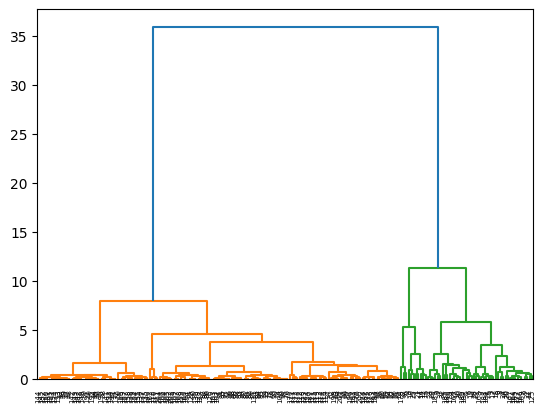

In [ ]:
# create Agglomerative Clustering model
hac2 = AgglomerativeClustering(n_clusters = 2,
                                affinity = "euclidean",       # choosing the affinity of "euclidean" --> continuous data
                                linkage = "ward")             # choosing the linkage of "ward" --> typically the default

# fitting the model and building a dendrogram
hac2.fit(X2)
dendro = sch.dendrogram(sch.linkage(X2[new_features], method='ward'))

# grabbing the cluster labers for each point
membership2 = hac2.labels_
X2["cluster3"] = membership2

In [ ]:
silhouette_score(X2, membership2)

0.7645957256683231

When we did not include Carbohydrates_100g in our list of predictors, the silhouette score for our **Hierarchical** model was 0.7366683007935623. With the change of including Carbohydrates_100g, we got a silhouette score of 0.7645957256683231. This increase in the silhouette score tells us that our new clustering model stronger as adding the Carbohydrates_100g variable increased the fit of our clustering model. While the change is not significant, the increase is still something to take into account, it tells us that this variable has a noticeable affect on the clustering algorithm.
